<a href="https://colab.research.google.com/github/yvnnng/COGS108_Repo/blob/main/LEGO_Project_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
from urllib.request import Request, urlopen

# Import seaborn and apply its plotting styles
import seaborn as sns

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

#improve resolution
%config InlineBackend.figure_format ='retina'


In [ ]:
brickset = pd.read_csv('https://raw.githubusercontent.com/nk0305/COGS108_Repo/main/brickset.csv')
brickset.head()

,set_number,name,theme,subtheme,year,pieces,no_of_minifigs,minifig_list,rrp,ppp,...,value_new,value_used,notes,no_owned,no_want,rating,num_ratings,num_reviews,tags,designer
0,8630-1,Gold Hunt,Agents,NaN,2008,352.0,3.0,"['agt007', 'agt008', 'agt009']",NaN,8.5c,...,~$87.35,~$22.75,NaN,3182.0,1188,4.0,95.0,11.0,"['Agent Fuse', 'Gold Tooth', 'Henchman', '4X4'...",['Mark Stafford']
1,8631-1,Jetpack Pursuit,Agents,NaN,2008,88.0,2.0,"['agt004', 'agt005']",NaN,11.4c,...,~$36.18,~$10.11,NaN,4534.0,960,3.9,124.0,27.0,"['Agent Chase', 'Saw Fist', 'Aircraft', 'Dr In...",NaN
2,8632-1,Swamp Raid,Agents,NaN,2008,231.0,2.0,"['agt003', 'agt006']",NaN,8.7c,...,~$51.25,~$17.15,NaN,3564.0,1085,3.9,106.0,18.0,"['Agent Charge', 'Break Jaw', 'Boat', 'Crimina...",['Mark Stafford']
3,8633-1,Speedboat Rescue,Agents,NaN,2008,340.0,3.0,"['agt001a', 'agt002', 'agt003']",NaN,11.8c,...,~$90.56,~$35.70,NaN,2490.0,1239,3.9,75.0,9.0,"['Agent Chase', 'Agent Trace', 'Break Jaw', 'B...",['Raphael Pretesacque']
4,8634-1,Turbocar Chase,Agents,NaN,2008,498.0,3.0,"['agt001', 'agt008', 'agt015']",NaN,10.0c,...,~$220.00,~$52.70,NaN,2439.0,1433,4.3,76.0,9.0,"['Agent Chase', 'Henchman', 'Spy Clops', 'Airc...",['Raphael Pretesacque']


In [ ]:
brickset = brickset.drop(columns = ['packaging', 'subtheme', 'rrp', 'ppp', 'notes'])
brickset.columns = ['Set_number', 'Name', 'Theme','Year','Pieces','No_of_minifigs','Minifig_list','Launch_and_Exit','newValue','usedValue','No_owned','No_want','Rating','Num_ratings','Num_reviews','Tags','Designer']
#Define a function to clean 'Launch_and_Exit' column

def clean_LnE(string):

    new_string = re.sub(r'\([^)]*\)', '', string)

    return new_string

#Apply the function to designated column

brickset['Launch_and_Exit'] = brickset['Launch_and_Exit'].astype('str')
brickset['Launch_and_Exit'] = brickset['Launch_and_Exit'].apply(clean_LnE)

#Separate launch and exit date

for date in brickset['Launch_and_Exit']:
 sep_string = re.split(" - ", date)

#create two new columns based on separated dates. Then, delete original "Launch_and_Exit" column

brickset['Launch_Date'] = sep_string[0]

brickset['Exit_Date'] = sep_string[1]

brickset = brickset.drop(columns = 'Launch_and_Exit')

#Finally, review the updated dataset

brickset.head()

,Set_number,Name,Theme,Year,Pieces,No_of_minifigs,Minifig_list,newValue,usedValue,No_owned,No_want,Rating,Num_ratings,Num_reviews,Tags,Designer,Launch_Date,Exit_Date
0,8630-1,Gold Hunt,Agents,2008,352.0,3.0,"['agt007', 'agt008', 'agt009']",~$87.35,~$22.75,3182.0,1188,4.0,95.0,11.0,"['Agent Fuse', 'Gold Tooth', 'Henchman', '4X4'...",['Mark Stafford'],1 Jul 2002,31 Dec 2003
1,8631-1,Jetpack Pursuit,Agents,2008,88.0,2.0,"['agt004', 'agt005']",~$36.18,~$10.11,4534.0,960,3.9,124.0,27.0,"['Agent Chase', 'Saw Fist', 'Aircraft', 'Dr In...",NaN,1 Jul 2002,31 Dec 2003
2,8632-1,Swamp Raid,Agents,2008,231.0,2.0,"['agt003', 'agt006']",~$51.25,~$17.15,3564.0,1085,3.9,106.0,18.0,"['Agent Charge', 'Break Jaw', 'Boat', 'Crimina...",['Mark Stafford'],1 Jul 2002,31 Dec 2003
3,8633-1,Speedboat Rescue,Agents,2008,340.0,3.0,"['agt001a', 'agt002', 'agt003']",~$90.56,~$35.70,2490.0,1239,3.9,75.0,9.0,"['Agent Chase', 'Agent Trace', 'Break Jaw', 'B...",['Raphael Pretesacque'],1 Jul 2002,31 Dec 2003
4,8634-1,Turbocar Chase,Agents,2008,498.0,3.0,"['agt001', 'agt008', 'agt015']",~$220.00,~$52.70,2439.0,1433,4.3,76.0,9.0,"['Agent Chase', 'Henchman', 'Spy Clops', 'Airc...",['Raphael Pretesacque'],1 Jul 2002,31 Dec 2003


In [ ]:
print(brickset.shape)
print(brickset.info())
brickset.describe()

(15252, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15252 entries, 0 to 15251
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Set_number      15023 non-null  object 
 1   Name            15023 non-null  object 
 2   Theme           15252 non-null  object 
 3   Year            15252 non-null  object 
 4   Pieces          14646 non-null  float64
 5   No_of_minifigs  9008 non-null   float64
 6   Minifig_list    8666 non-null   object 
 7   newValue        11004 non-null  object 
 8   usedValue       10233 non-null  object 
 9   No_owned        14975 non-null  float64
 10  No_want         15252 non-null  int64  
 11  Rating          8176 non-null   float64
 12  Num_ratings     8176 non-null   float64
 13  Num_reviews     8338 non-null   float64
 14  Tags            15252 non-null  object 
 15  Designer        3140 non-null   object 
 16  Launch_Date     15252 non-null  object 
 17  Exit_Date       152

,Pieces,No_of_minifigs,No_owned,No_want,Rating,Num_ratings,Num_reviews
count,14646.000000,9008.000000,14975.000000,15252.000000,8176.000000,8176.000000,8338.000000
mean,248.577769,2.686945,2398.919933,820.640047,3.863796,117.937011,4.652555
std,501.607747,2.882958,3240.627230,1110.336861,0.359171,131.767826,6.089852
min,0.000000,1.000000,3.000000,1.000000,1.600000,9.000000,1.000000
25%,25.000000,1.000000,204.500000,125.000000,3.600000,40.000000,1.000000
50%,82.000000,2.000000,1064.000000,451.000000,3.900000,75.000000,3.000000
75%,270.000000,3.000000,3345.500000,1050.000000,4.100000,144.000000,5.000000
max,11695.000000,80.000000,30286.000000,14247.000000,4.900000,1523.000000,93.000000


In [ ]:
# Pull color data
req = Request(
    url='https://www.bricklink.com/catalogColors.asp?v=0&itemType=P&itemNo=',
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:122.0) Gecko/20100101 Firefox/122.0'}
)
color_bricklink_tables = pd.read_html(urlopen(req))

# Helper functions
def extract_first_date(string):
    string = string.replace('\xa0','')
    match = re.match(r'(\d+)-(\d+)', string)
    if match == None:
        return np.nan
    else:
        return match.group(1)

def extract_last_date(string):
    string = string.replace('\xa0','')
    match = re.match(r'(\d+)-(\d+)', string)
    if match == None:
        return np.nan
    else:
        return match.group(2)

def bricklink_fix(df):
    df = df.dropna(axis=1, how='all')
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])
    #print(df.head())
    df = df.set_index('ID')
    #df['Color Timeline'].apply(extract_dates)
    df['First Year Active'] = df['Color Timeline'].apply(extract_first_date)
    df['Recent Year Active'] = df['Color Timeline'].apply(extract_last_date)
    df = df.drop("Color Timeline", axis=1)
    return df

# Fix all of the tables and combine them
bricklink_tables = []
bricklink_tables.append(bricklink_fix(color_bricklink_tables[4]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[7]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[10]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[13]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[16]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[19]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[22]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[25]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[28]))
bricklink = pd.concat(bricklink_tables)
bricklink = bricklink.dropna()
bricklink.head()

,Name,Parts,In Sets,Wanted,For Sale,First Year Active,Recent Year Active
ID,,,,,,,
1,White,15341,11330,22521,15622,1949,2024
49,Very Light Gray,21,24,1426,62,1997,2004
99,Very Light Bluish Gray,53,49,1837,102,2004,2013
86,Light Bluish Gray,4795,7621,8777,5383,2003,2024
9,Light Gray,1863,3204,5846,2476,1954,2008


In [ ]:
def get_bricklink_id(string):
    string = string.strip()
    match = re.match(r'(\d+)', string)
    if match:
        return match.group(1)
    else:
        return None  # Return an appropriate value when there is no match

# Use the correct raw URL to the CSV file on GitHub
csv_url = 'https://raw.githubusercontent.com/yvnnng/COGS108_Repo/main/colors_updated.csv'

# Read the CSV file from the provided URL
try:
    colors_detailed = pd.read_csv(csv_url)
except Exception as e:
    print(f"Error reading CSV file: {e}")
    colors_detailed = pd.DataFrame()

# These colors do not have official names or have any dates. These colors are extremely rare, so we probably don't need them.
colors_detailed = colors_detailed.dropna(axis=0, subset=['LEGO', 'First Year', 'BrickLink'])
colors_detailed = colors_detailed.drop(['Img', 'Unnamed: 0', 'ID', 'First Year', 'Last Year', 'Name'], axis=1)
colors_detailed['BrickLink ID'] = colors_detailed['BrickLink'].apply(get_bricklink_id)
colors_detailed = colors_detailed.set_index('BrickLink ID')

# Assuming bricklink is defined earlier in your code
colors_df = pd.merge(colors_detailed, bricklink, left_index=True, right_index=True)
colors_df.head()

,RGB,Num Parts,Num Sets,LEGO,LDraw,BrickLink,BrickOwl,Name,Parts,In Sets,Wanted,For Sale,First Year Active,Recent Year Active
1,FFFFFF,421686,123247,1 ['White'],15 ['White'],1 ['White'],92 ['White'],White,15341,11330,22521,15622,1949,2024
10,6D6E5C,22319,7750,"27 ['Dark grey', 'DK.GREY']",8 ['Dark_Gray'],10 ['Dark Gray'],53 ['Dark Gray'],Dark Gray,1054,1706,4177,1496,1961,2006
100,DF6695,233,49,114 ['Tr. Medium Reddish-Violet w. Glitter 2%'...,114 ['Glitter_Trans_Dark_Pink'],100 ['Glitter Trans-Dark Pink'],132 ['Transparent Pink Glitter'],Glitter Trans-Dark Pink,12,40,151,16,1999,2024
101,FFFFFF,233,41,"117 ['Transparent Glitter', 'TR.W.GLITTER'] 12...",117 ['Glitter_Trans_Clear'],101 ['Glitter Trans-Clear'],131 ['Transparent Glitter'],Glitter Trans-Clear,16,33,175,21,1999,2023
102,A5A5CB,140,67,"129 ['Tr. Bright Bluish Violet w. Glitter 2%',...",129 ['Glitter_Trans_Purple'],102 ['Glitter Trans-Purple'],22 ['Transparent Purple Glitter'],Glitter Trans-Purple,10,60,174,12,2000,2024


SQ1: What LEGO sets have been inspired by movies that contribute to set popularity?

In [ ]:
# Chose movies based on the articles "Best LEGO Sets Based on Movies, Ranked" (2022) and "10 Best Movie-Themed LEGO Sets Every Fan Needs" (2022)
# Citation 1: https://movieweb.com/lego-sets-based-on-movies-ranked/
# Citation 2: https://screenrant.com/best-movie-themed-lego-sets/

# Determining LEGO sets based on movies by their themes, then storing into 'movie' variable
movies = ['The Lord of the Rings', 'Harry Potter', 'Star Wars', 'Avatar', 'Marvel Super Heroes', 'DC Comics Super Heroes', 'Jurassic Park', 'The LEGO Movie', 'Ghostbusters', 'Disney']
movie_inspo = brickset[brickset['Theme'].isin(movies)]

# The rest of the LEGO sets
not_movie_inspo = brickset[~brickset['Theme'].isin(movies)]

# Taking a look at the general structure and summary statistics of chosen movie themes
print(movie_inspo.shape)
print(movie_inspo.info())
movie_inspo.describe()

(2100, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 3546 to 14092
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Set_number      1983 non-null   object 
 1   Name            1983 non-null   object 
 2   Theme           2100 non-null   object 
 3   Year            2100 non-null   object 
 4   Pieces          2020 non-null   float64
 5   No_of_minifigs  1457 non-null   float64
 6   Minifig_list    1384 non-null   object 
 7   newValue        1701 non-null   object 
 8   usedValue       1544 non-null   object 
 9   No_owned        2024 non-null   float64
 10  No_want         2100 non-null   int64  
 11  Rating          1603 non-null   float64
 12  Num_ratings     1603 non-null   float64
 13  Num_reviews     1374 non-null   float64
 14  Tags            2100 non-null   object 
 15  Designer        784 non-null    object 
 16  Launch_Date     2100 non-null   object 
 17  Exit_Date       21

,Pieces,No_of_minifigs,No_owned,No_want,Rating,Num_ratings,Num_reviews
count,2020.000000,1457.000000,2024.000000,2100.000000,1603.000000,1603.000000,1374.000000
mean,399.553960,3.424159,5367.361166,2060.043333,3.871429,222.404866,7.225619
std,675.967622,2.984146,4811.556835,1772.067627,0.335230,199.188012,9.901042
min,1.000000,1.000000,5.000000,17.000000,2.600000,19.000000,1.000000
25%,60.000000,1.000000,1263.500000,716.000000,3.600000,70.500000,2.000000
50%,197.000000,3.000000,4378.000000,1668.000000,3.900000,170.000000,4.000000
75%,466.000000,4.000000,8063.000000,2860.000000,4.100000,309.500000,8.000000
max,7541.000000,32.000000,29768.000000,12013.000000,4.700000,1418.000000,85.000000


In [ ]:
# Taking a look at the general structure and summary statistics of the remaining LEGO sets
print(not_movie_inspo.shape)
print(not_movie_inspo.info())
not_movie_inspo.describe()

(13152, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13152 entries, 0 to 15251
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Set_number      13040 non-null  object 
 1   Name            13040 non-null  object 
 2   Theme           13152 non-null  object 
 3   Year            13152 non-null  object 
 4   Pieces          12626 non-null  float64
 5   No_of_minifigs  7551 non-null   float64
 6   Minifig_list    7282 non-null   object 
 7   newValue        9303 non-null   object 
 8   usedValue       8689 non-null   object 
 9   No_owned        12951 non-null  float64
 10  No_want         13152 non-null  int64  
 11  Rating          6573 non-null   float64
 12  Num_ratings     6573 non-null   float64
 13  Num_reviews     6964 non-null   float64
 14  Tags            13152 non-null  object 
 15  Designer        2356 non-null   object 
 16  Launch_Date     13152 non-null  object 
 17  Exit_Date       131

,Pieces,No_of_minifigs,No_owned,No_want,Rating,Num_ratings,Num_reviews
count,12626.000000,7551.000000,12951.000000,13152.000000,6573.000000,6573.000000,6964.000000
mean,224.423491,2.544696,1935.007876,622.742625,3.861935,92.459760,4.144888
std,463.211115,2.841291,2633.248774,802.527401,0.364771,92.817995,4.848721
min,0.000000,1.000000,3.000000,1.000000,1.600000,9.000000,1.000000
25%,23.000000,1.000000,163.000000,102.000000,3.600000,36.000000,1.000000
50%,70.000000,2.000000,834.000000,360.000000,3.900000,66.000000,3.000000
75%,239.000000,3.000000,2700.000000,834.000000,4.100000,120.000000,5.000000
max,11695.000000,80.000000,30286.000000,14247.000000,4.900000,1523.000000,93.000000


# Write-Up
Total entries for 10 movie themes -> 2100/15252 -> 13.77% (keep in mind there could be more), but we are specifically looking at these based off articles.
Notice there is missing data across all 18 columns of characteristics for each set and is expected. Notice "Theme", "Year", "No_want", "Tags", "Launch_Date" and "Exit_Date" are best documented in general.
Summary statistics is a great snapshot of the characteristics we are focusing on. Some interesting things include the mean for movie-inspired sets have 3.4 Minifigures, 400 pieces, and 3.87 rating. Whereas the remaining sets see a slight decline with 2.5 Minifigures and 224 pieces, but a similar rating of 3.86.
We can also see that there are relatively large standard deviations between these sets which is most likely caused by the outliers. We notice that there is a min for 1 piece which most likely indicates a single Minifigure in the set for the movie inspired sets. In terms of maxes for the movies, there are LEGO sets with 7541 pieces, 32 Minifigures, owned by almost 30,000 people or wanted by 12,000 people but we cannot simply assume these statistics all refer to the same set.

In [ ]:
# Filter rows where 'Theme' is in the specified movies and sum the 'No_want' column
movie_inspo_wants = brickset.loc[brickset['Theme'].isin(movies)].groupby('Theme')['No_want'].sum()

# Taking a look at the number of people who want sets in movie inspired themes
movie_inspo_wants

Theme
Avatar                       7371
DC Comics Super Heroes     206721
Disney                      89796
Ghostbusters                 9321
Harry Potter               313431
Marvel Super Heroes        390057
Star Wars                 3186619
The LEGO Movie              64814
The Lord of the Rings       57961
Name: No_want, dtype: int64

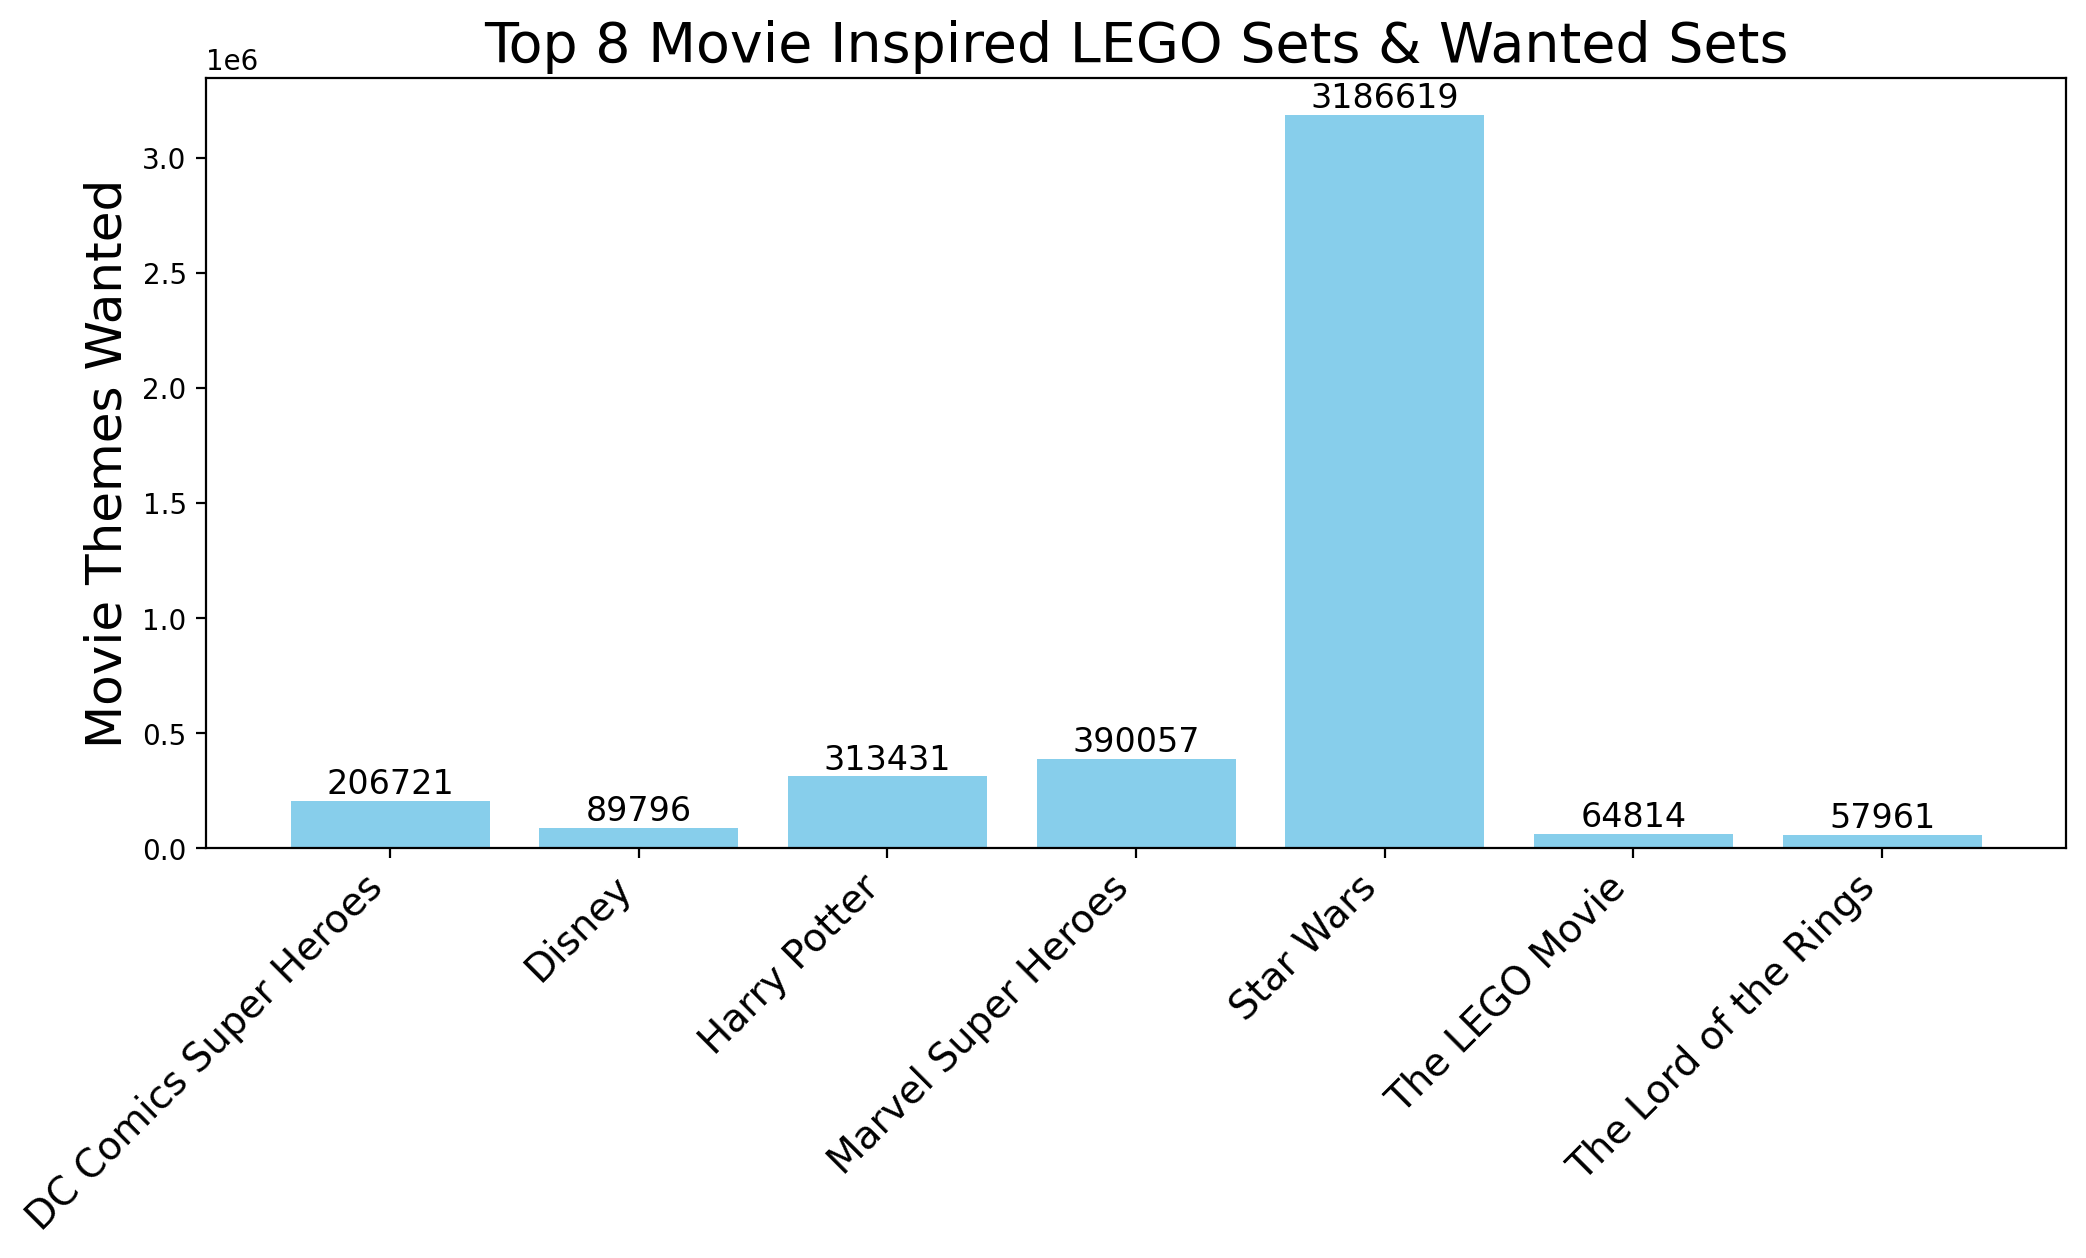

In [ ]:
# Dropping Avatar and Ghostbusters themes
top8_movies = ['The Lord of the Rings', 'Harry Potter', 'Star Wars', 'Marvel Super Heroes', 'DC Comics Super Heroes', 'Jurassic Park', 'The LEGO Movie', 'Disney']
movie_inspo_wants = brickset.loc[brickset['Theme'].isin(top8_movies)].groupby('Theme')['No_want'].sum()

plt.bar(movie_inspo_wants.index, movie_inspo_wants.values, color='skyblue')

# Formatting for the plot
plt.title('Top 8 Movie Inspired LEGO Sets & Wanted Sets', fontsize = 20)
plt.xticks(rotation = 45, ha = 'right', fontsize = 14)
plt.ylabel('Movie Themes Wanted', fontsize = 18);

for i, value in enumerate(movie_inspo_wants.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize = 12, fontweight='normal')

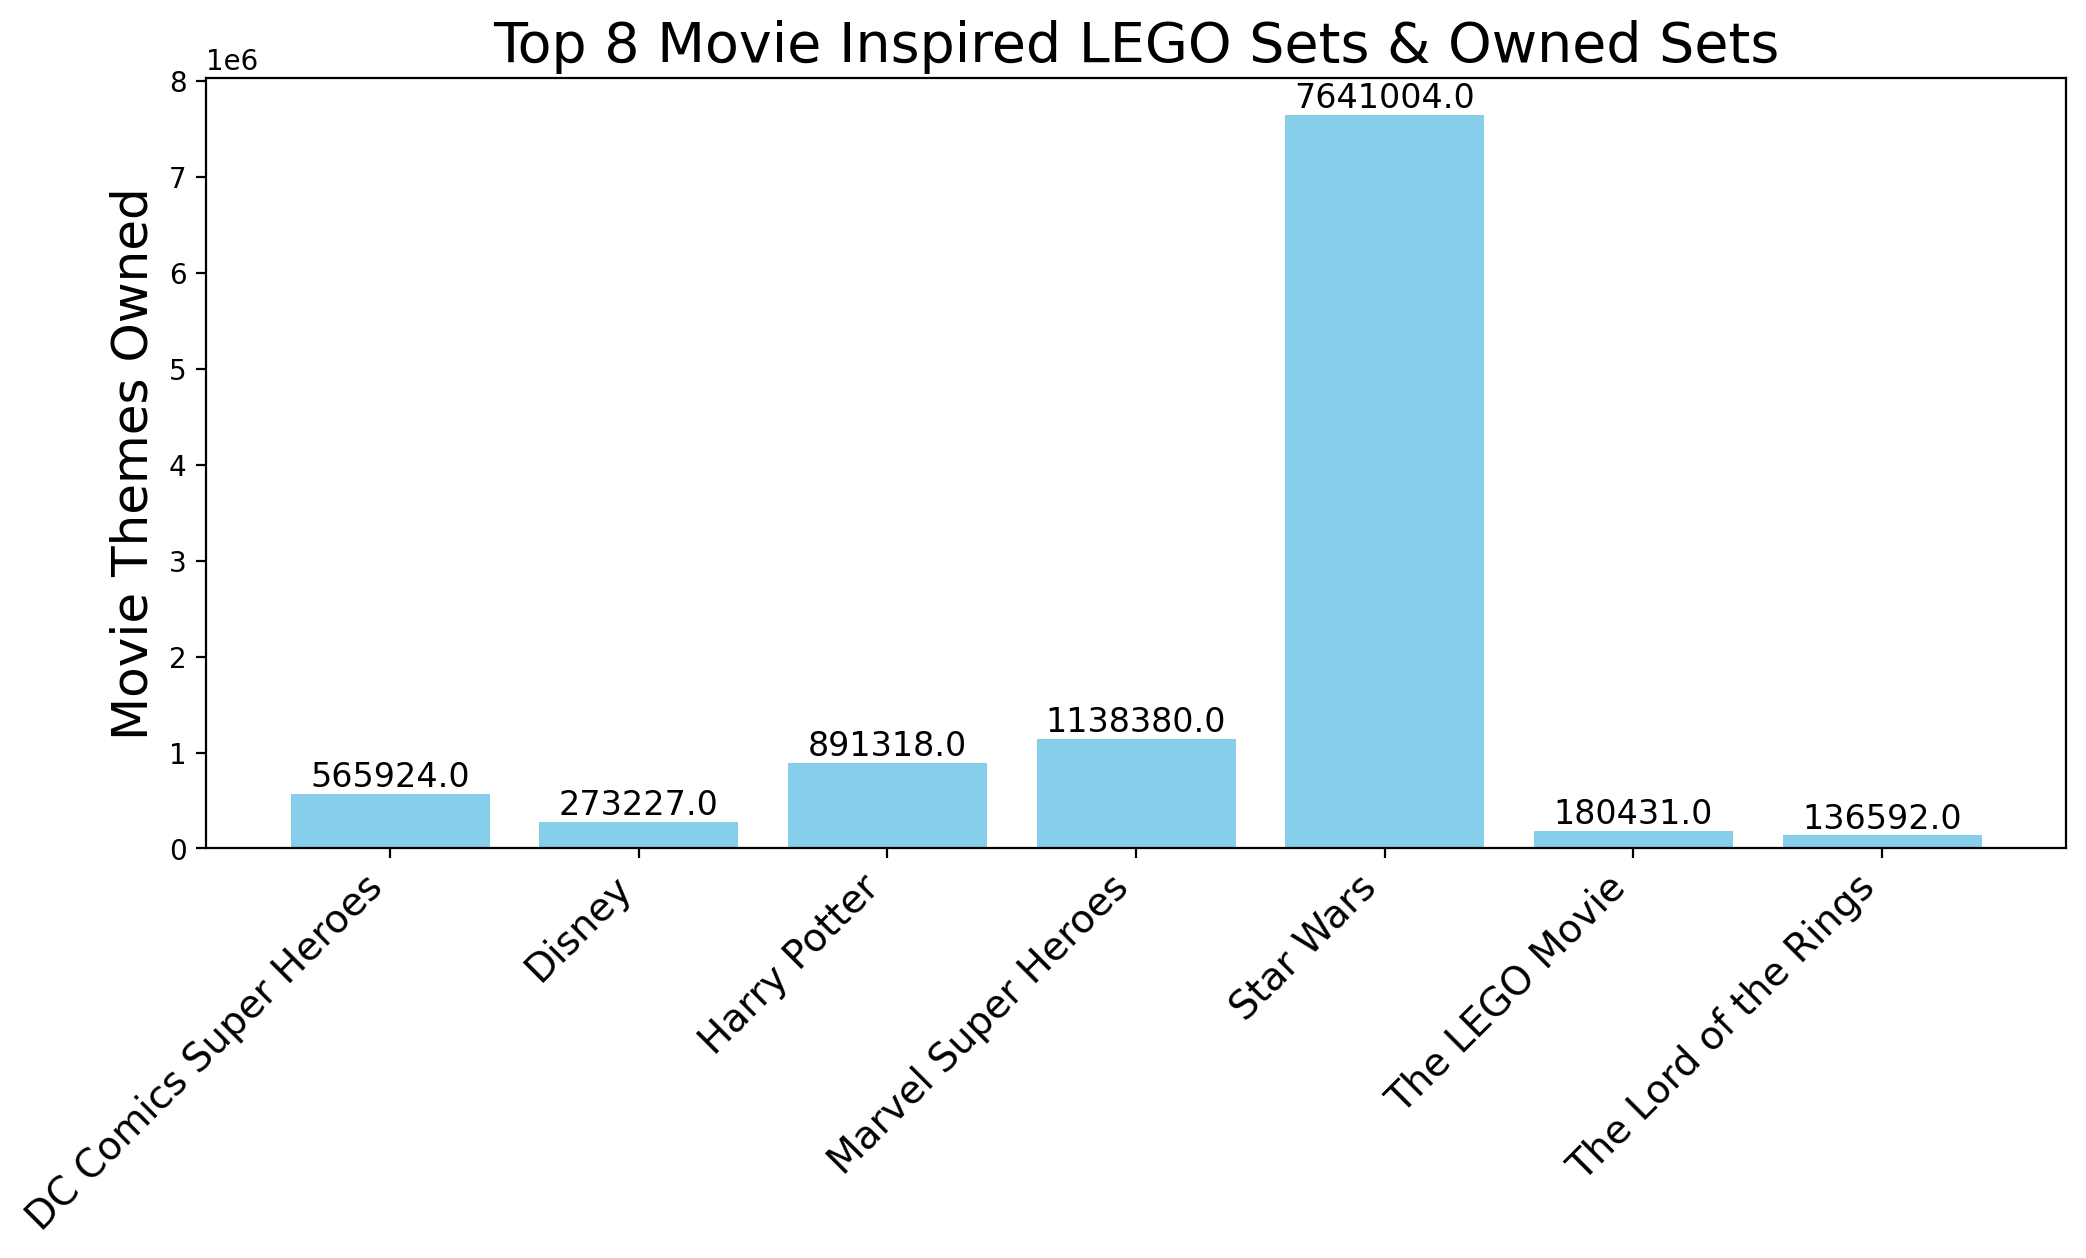

In [ ]:
top8_movies = ['The Lord of the Rings', 'Harry Potter', 'Star Wars', 'Marvel Super Heroes', 'DC Comics Super Heroes', 'Jurassic Park', 'The LEGO Movie', 'Disney']
movie_inspo_owned = brickset.loc[brickset['Theme'].isin(top8_movies)].groupby('Theme')['No_owned'].sum()

plt.bar(movie_inspo_owned.index, movie_inspo_owned.values, color='skyblue')

# Formatting for the plot
plt.title('Top 8 Movie Inspired LEGO Sets & Owned Sets', fontsize = 20)
plt.xticks(rotation = 45, ha = 'right', fontsize = 14)
plt.ylabel('Movie Themes Owned', fontsize = 18);

for i, value in enumerate(movie_inspo_owned.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize = 12, fontweight='normal')

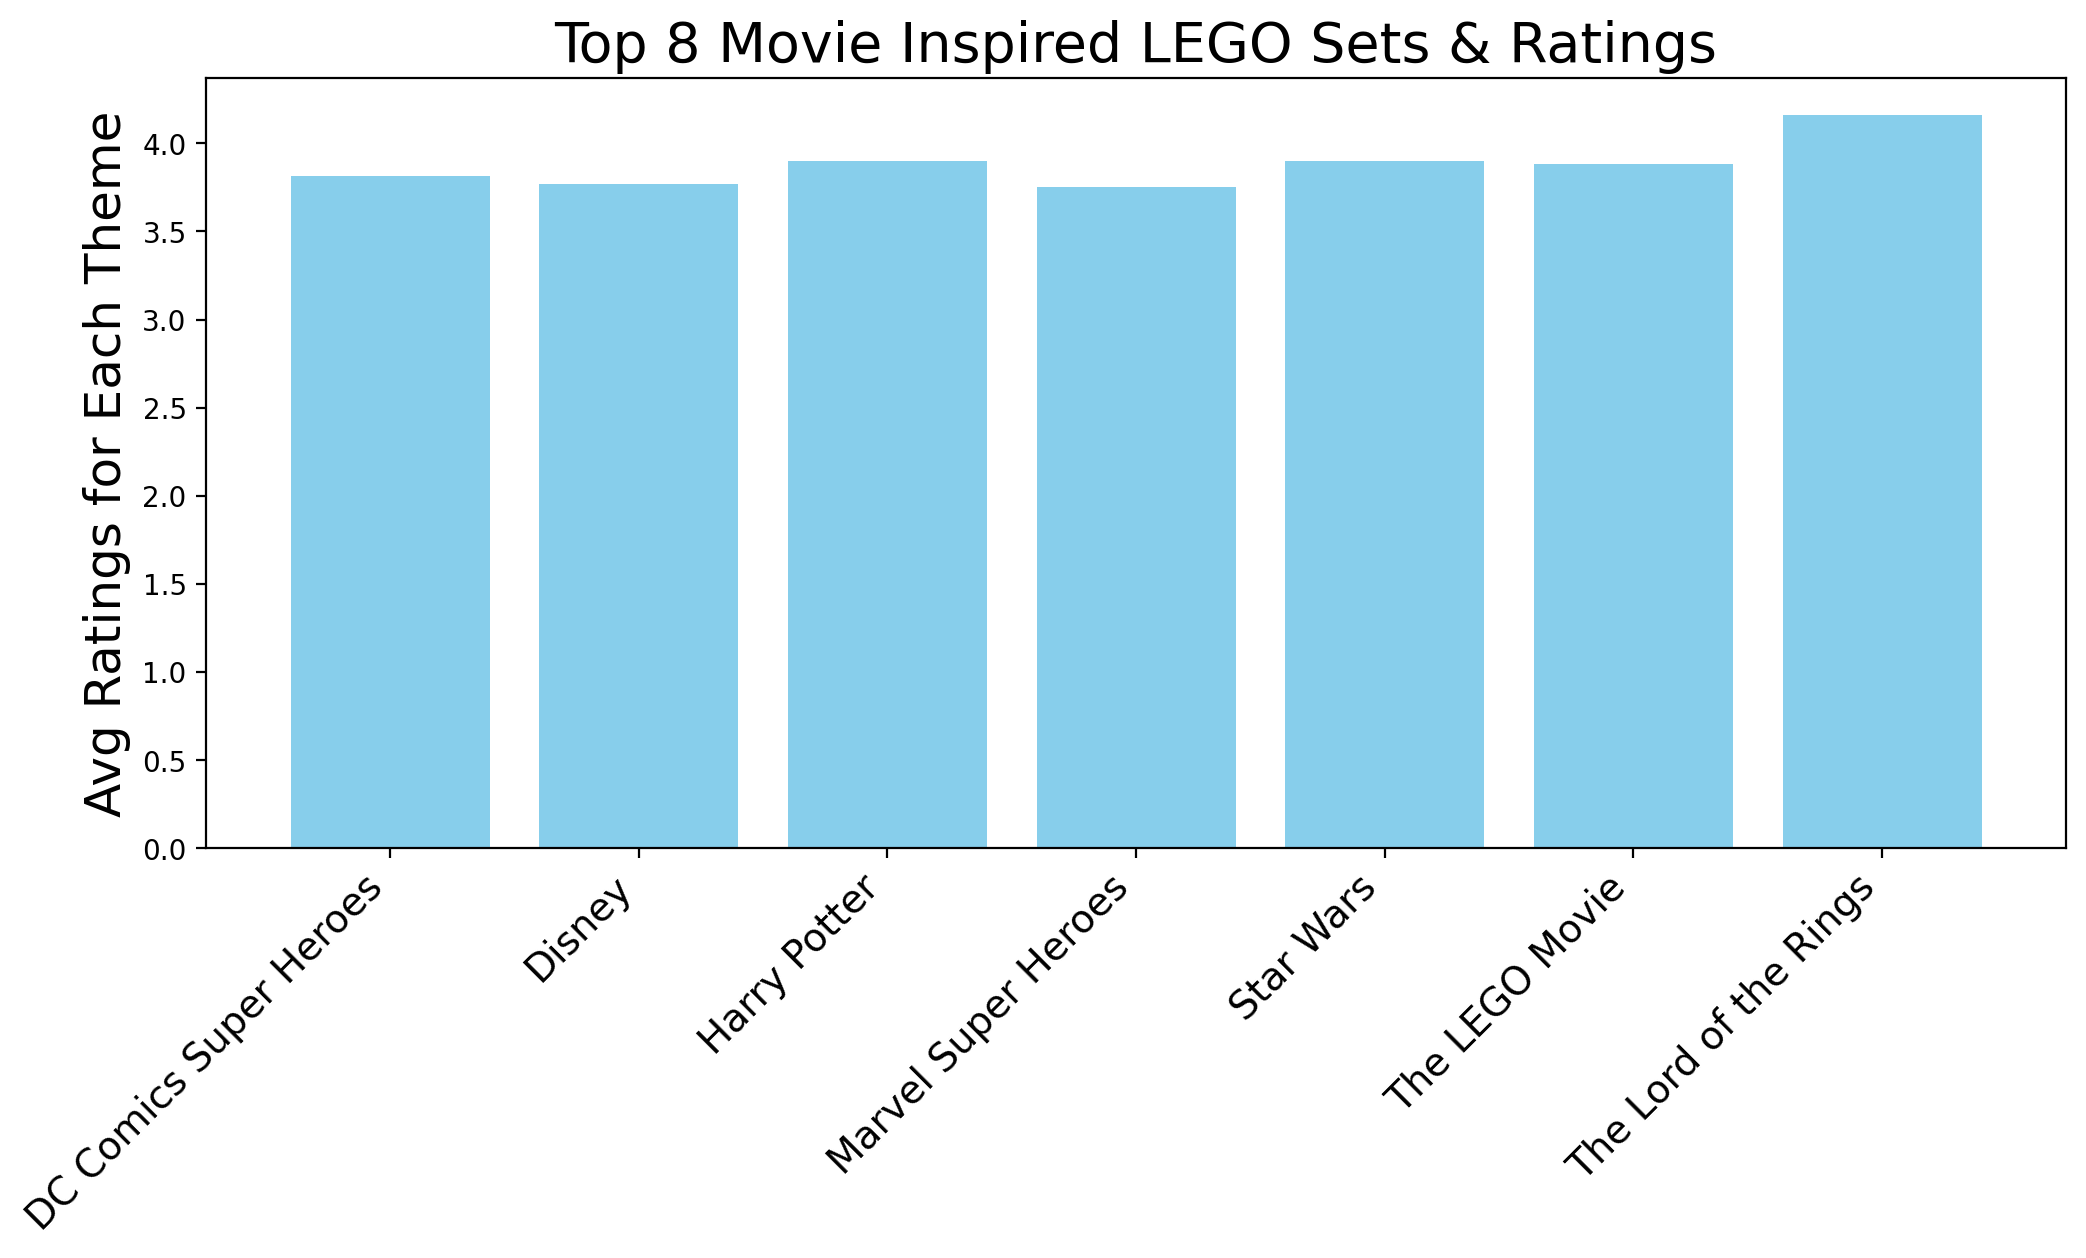

In [ ]:
movie_inspo_rating = brickset.loc[brickset['Theme'].isin(top8_movies)].groupby('Theme')['Rating'].mean()
plt.bar(movie_inspo_rating.index, movie_inspo_rating.values, color='skyblue')

# Formatting for the plot
plt.title('Top 8 Movie Inspired LEGO Sets & Ratings', fontsize = 20)
plt.xticks(rotation = 45, ha = 'right', fontsize = 14)
plt.ylabel('Avg Ratings for Each Theme', fontsize = 18);

# SQ1 Analysis
Some movies have higher demands and owned counts. Just within this sample, we can see very famous movies have significant weight. Some movies perform better than others.
Interestingly though, the rating doesn't seem to have the greatest impact on the popularity of the sets and they roughly have the same ratings. The Lord of the Rings is slightly higher than the others, but is not necessarily the most wanted or most owned.

# SQ2: How do varying number of pieces amongst sets influence their popularity?

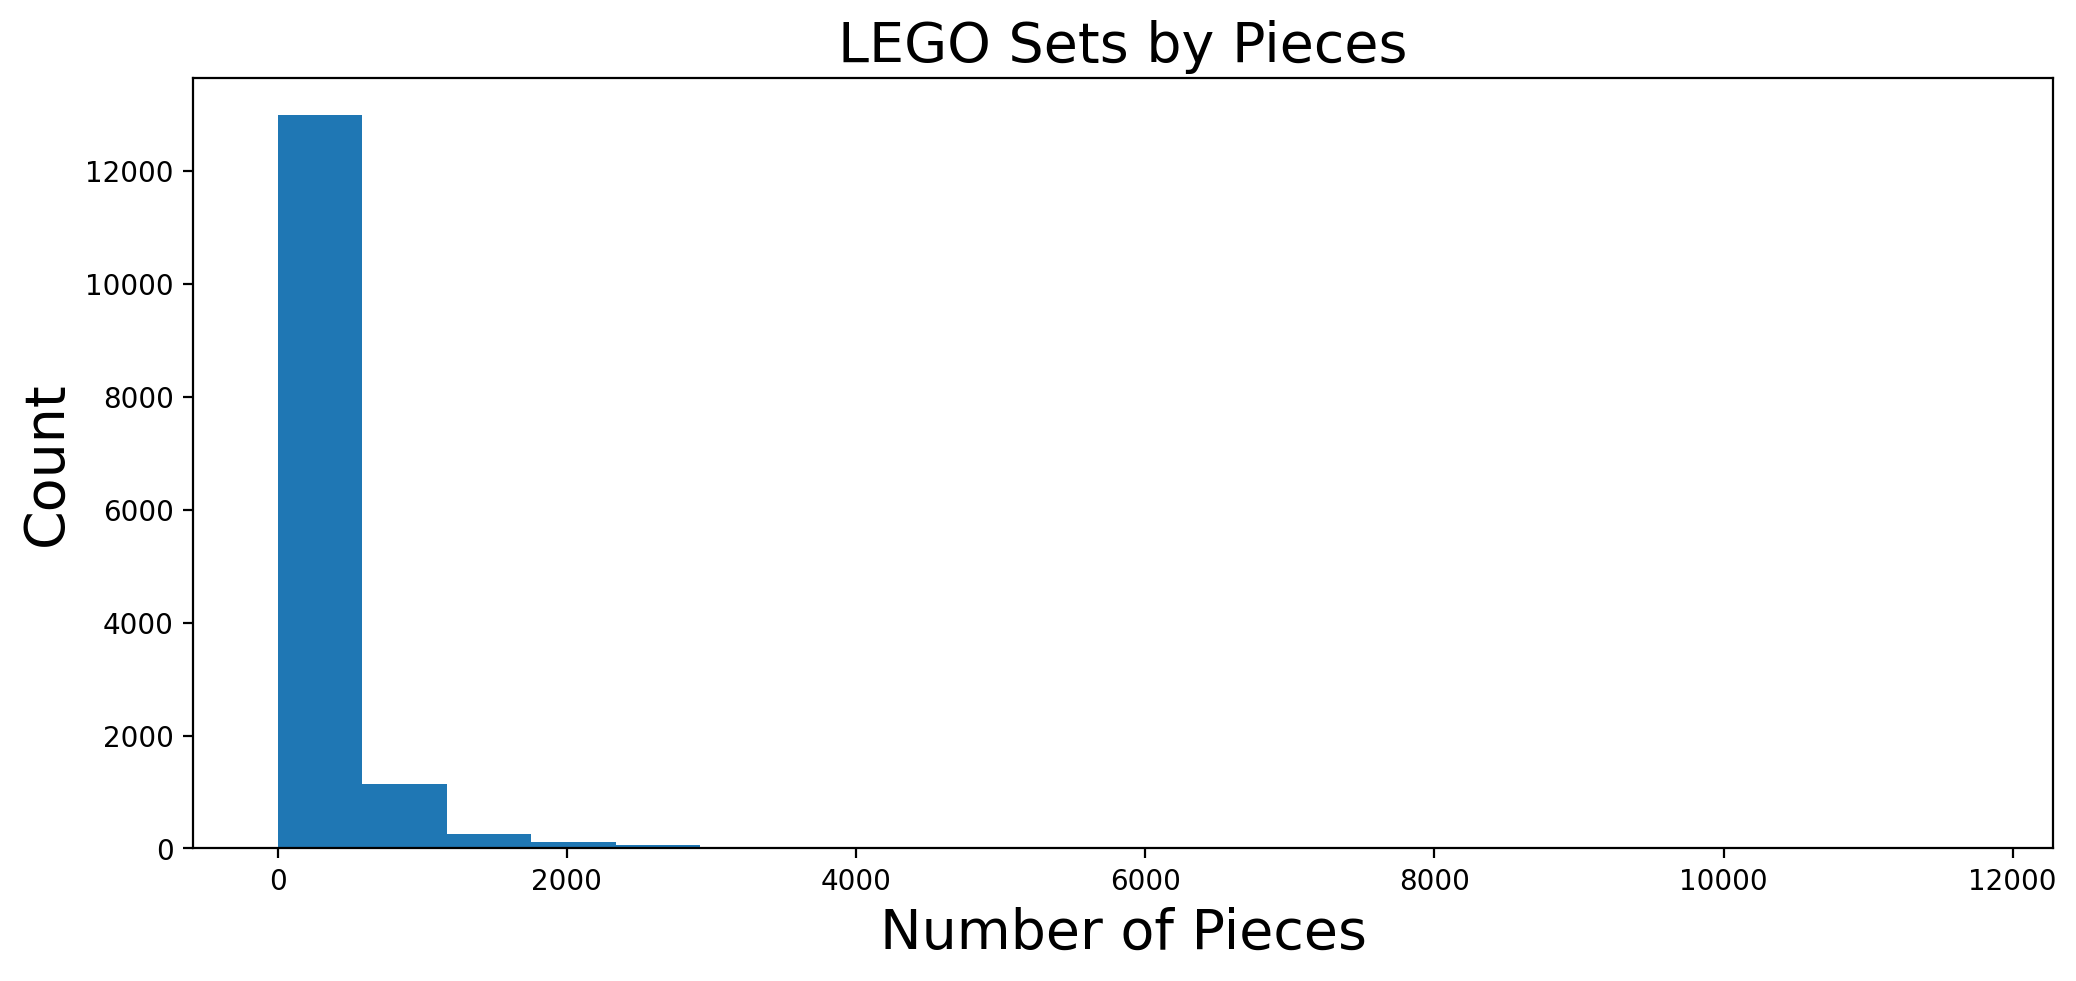

In [ ]:
# Looking into the distribution of LEGO sets by number of pieces
brickset['Pieces'].plot(kind='hist', bins=20)
plt.title('LEGO Sets by Pieces', fontsize = 20)
plt.xlabel('Number of Pieces', fontsize = 20)
plt.ylabel('Count', fontsize = 20);

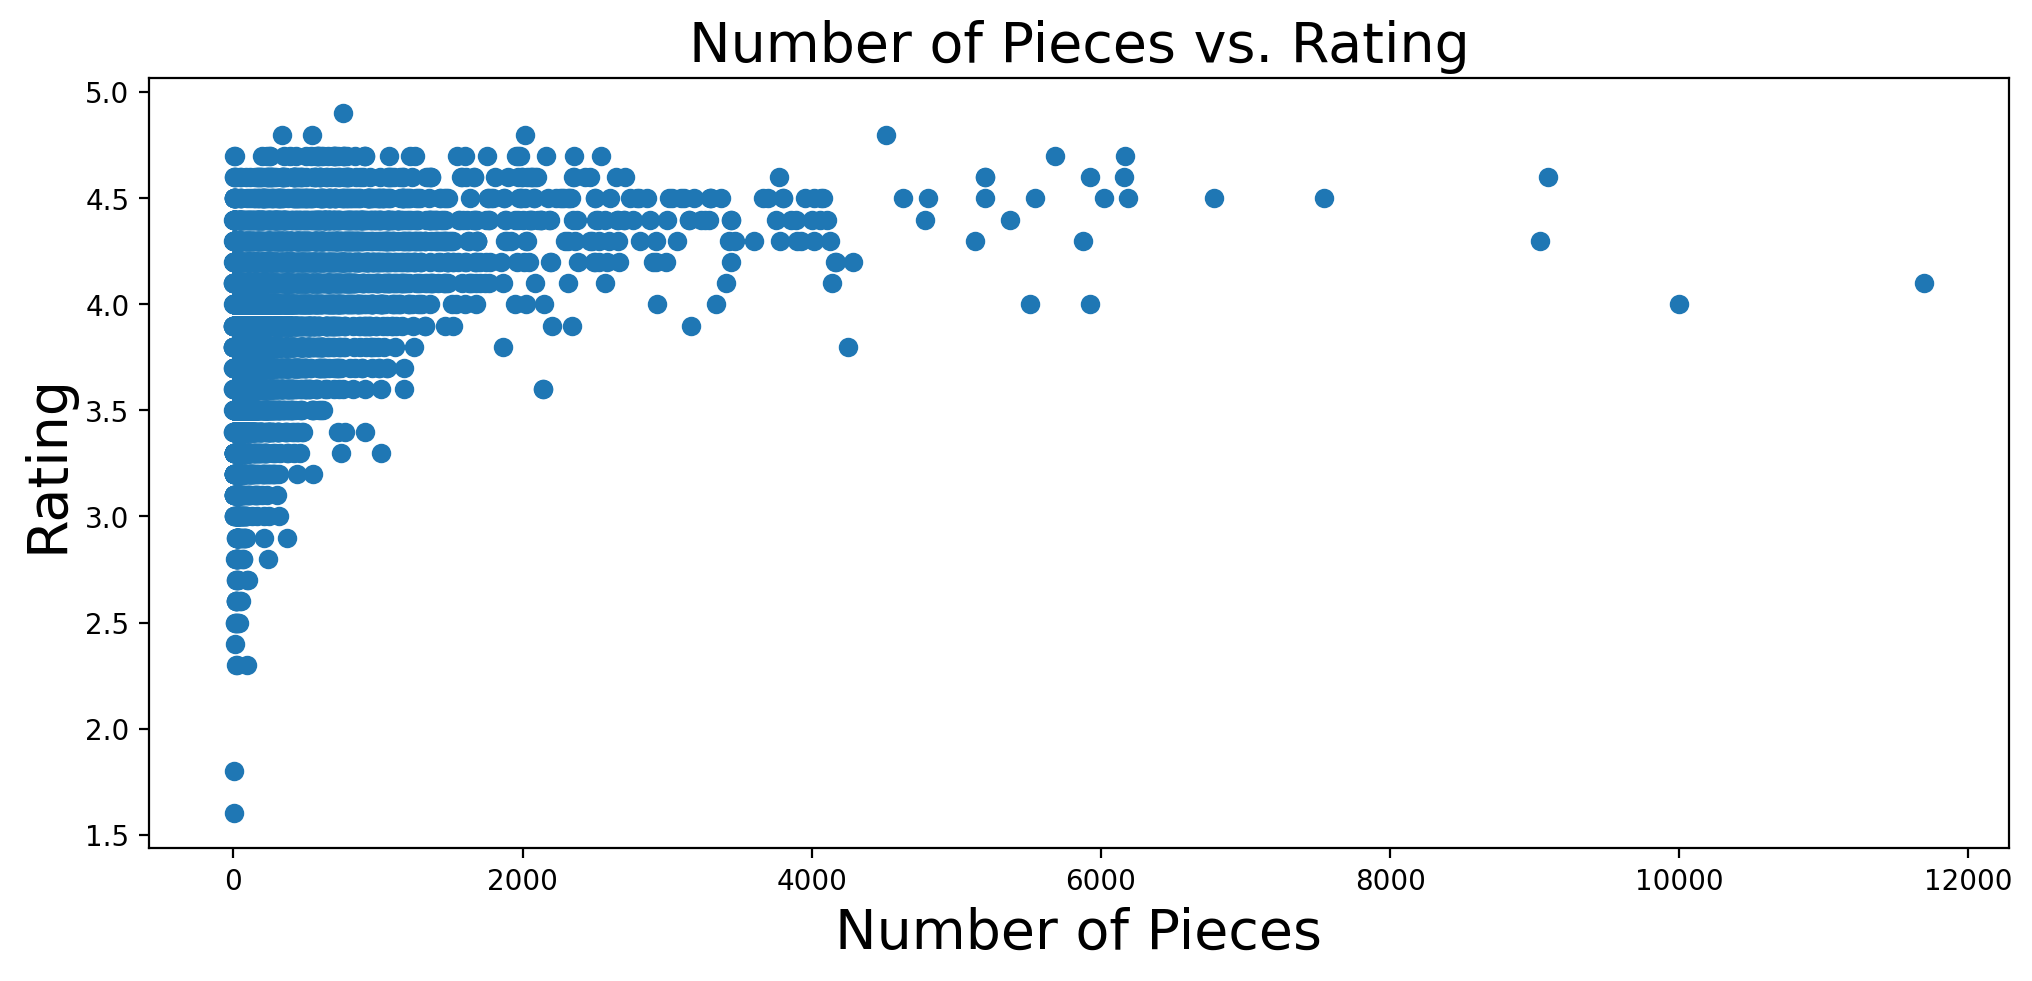

In [ ]:
# Taking a look at number of pieces versus ratings
plt.scatter(brickset['Pieces'], brickset['Rating'])
plt.title('Number of Pieces vs. Rating', fontsize = 20)
plt.xlabel('Number of Pieces', fontsize = 20)
plt.ylabel('Rating', fontsize = 20);

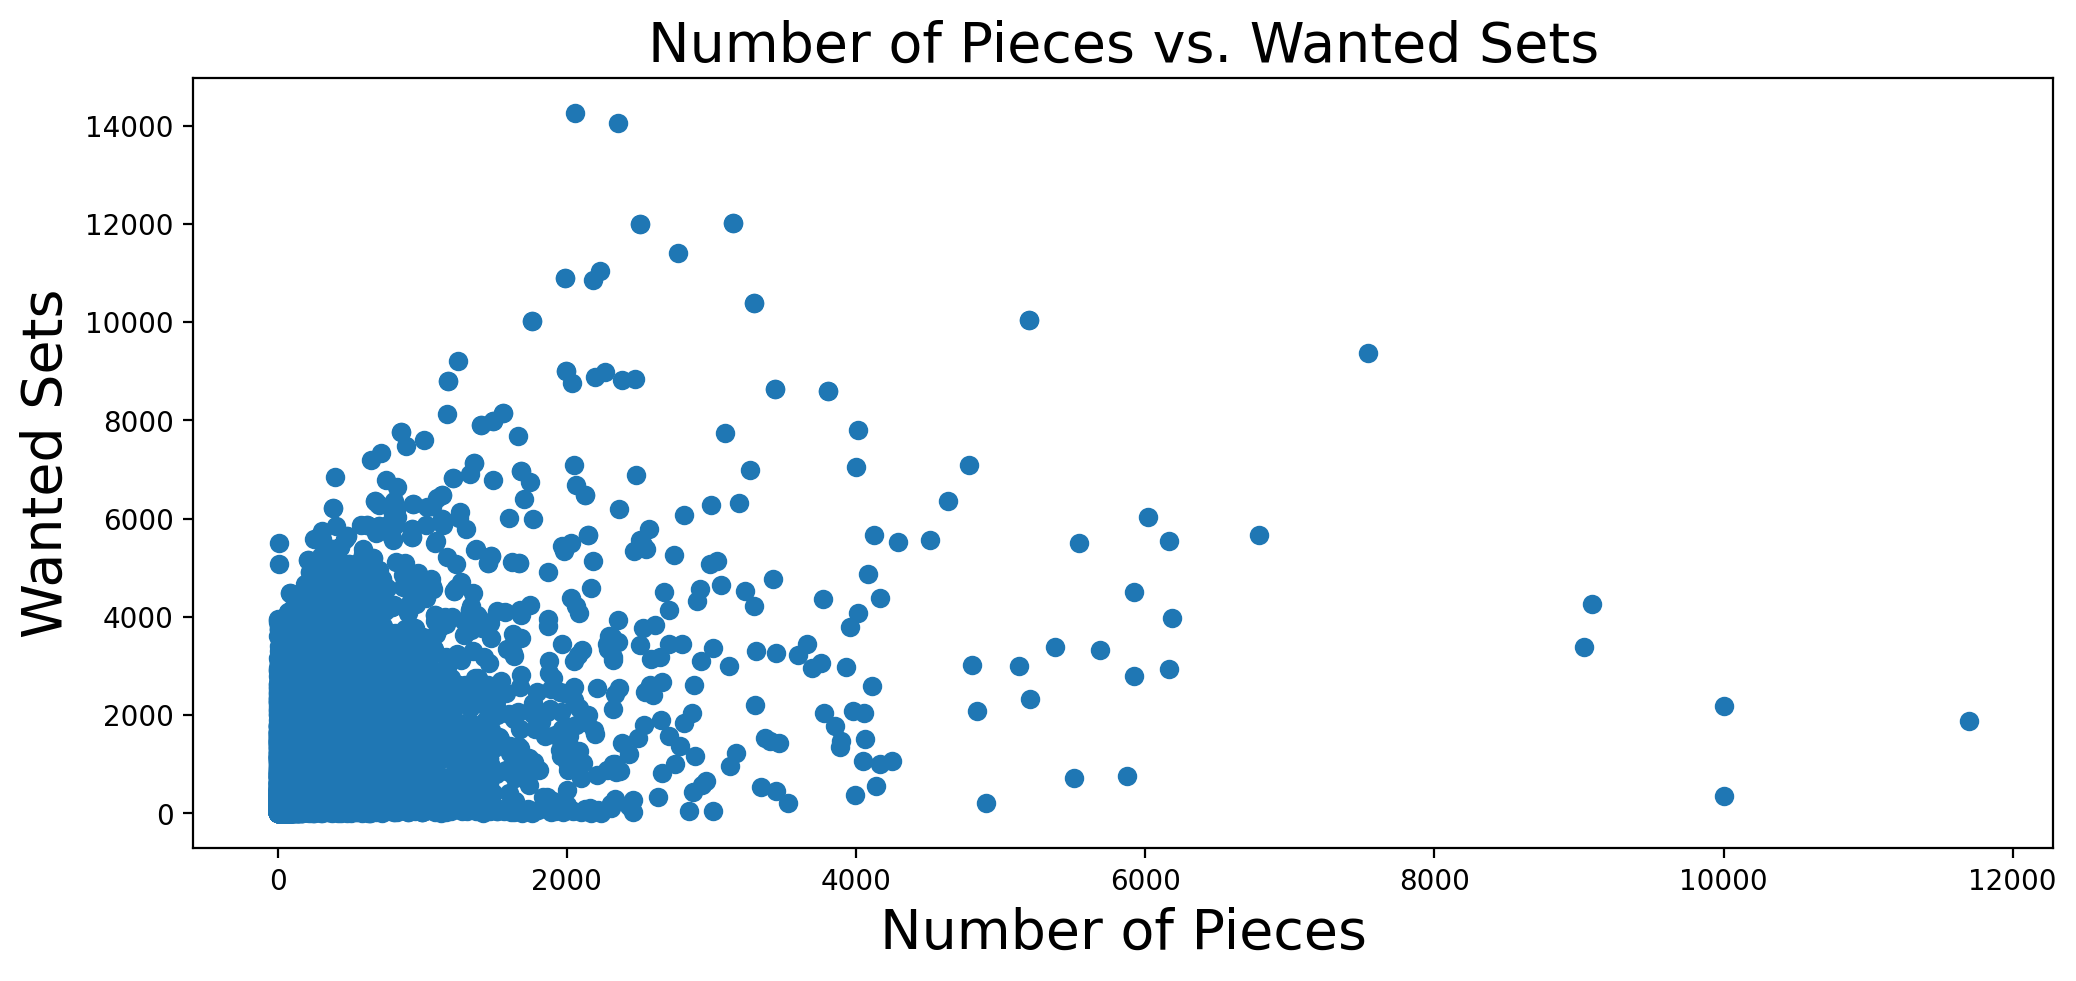

In [ ]:
# Taking a look at number of pieces versus wanted sets
plt.scatter(brickset['Pieces'], brickset['No_want'])
plt.title('Number of Pieces vs. Wanted Sets', fontsize = 20)
plt.xlabel('Number of Pieces', fontsize = 20)
plt.ylabel('Wanted Sets', fontsize = 20);

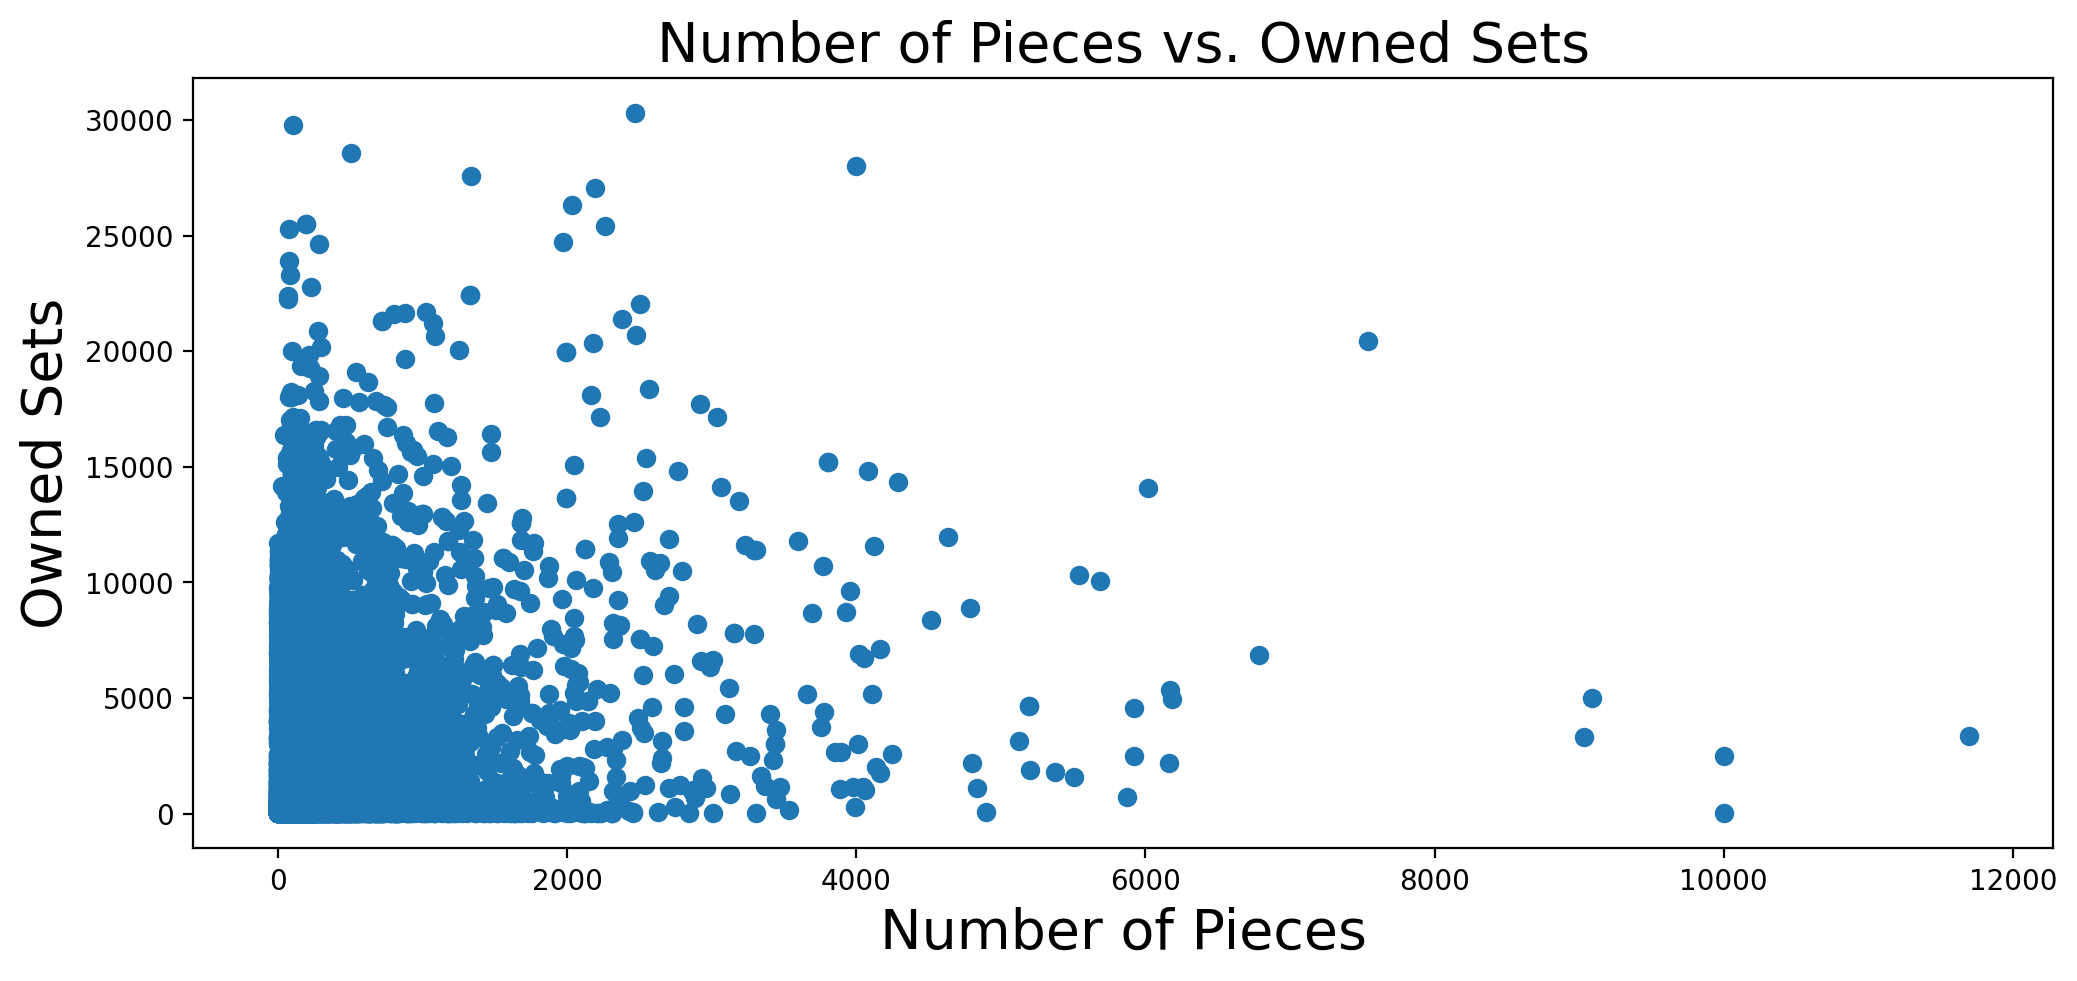

In [ ]:
# Taking a look at number of pieces versus owned sets
plt.scatter(brickset['Pieces'], brickset['No_owned'])
plt.title('Number of Pieces vs. Owned Sets', fontsize = 20)
plt.xlabel('Number of Pieces', fontsize = 20)
plt.ylabel('Owned Sets', fontsize = 20);

# SQ2 Analysis
majority of the sets are less than 2000 pieces
highest amount of pieces does not lead to highest rating, although high amount of pieces does generally better than small low amounts
most wanted sets are between 2000-4000 pieces
most owned sets are between 1-2000 pieces

# SQ3: Does the color variability contribute to set popularity?

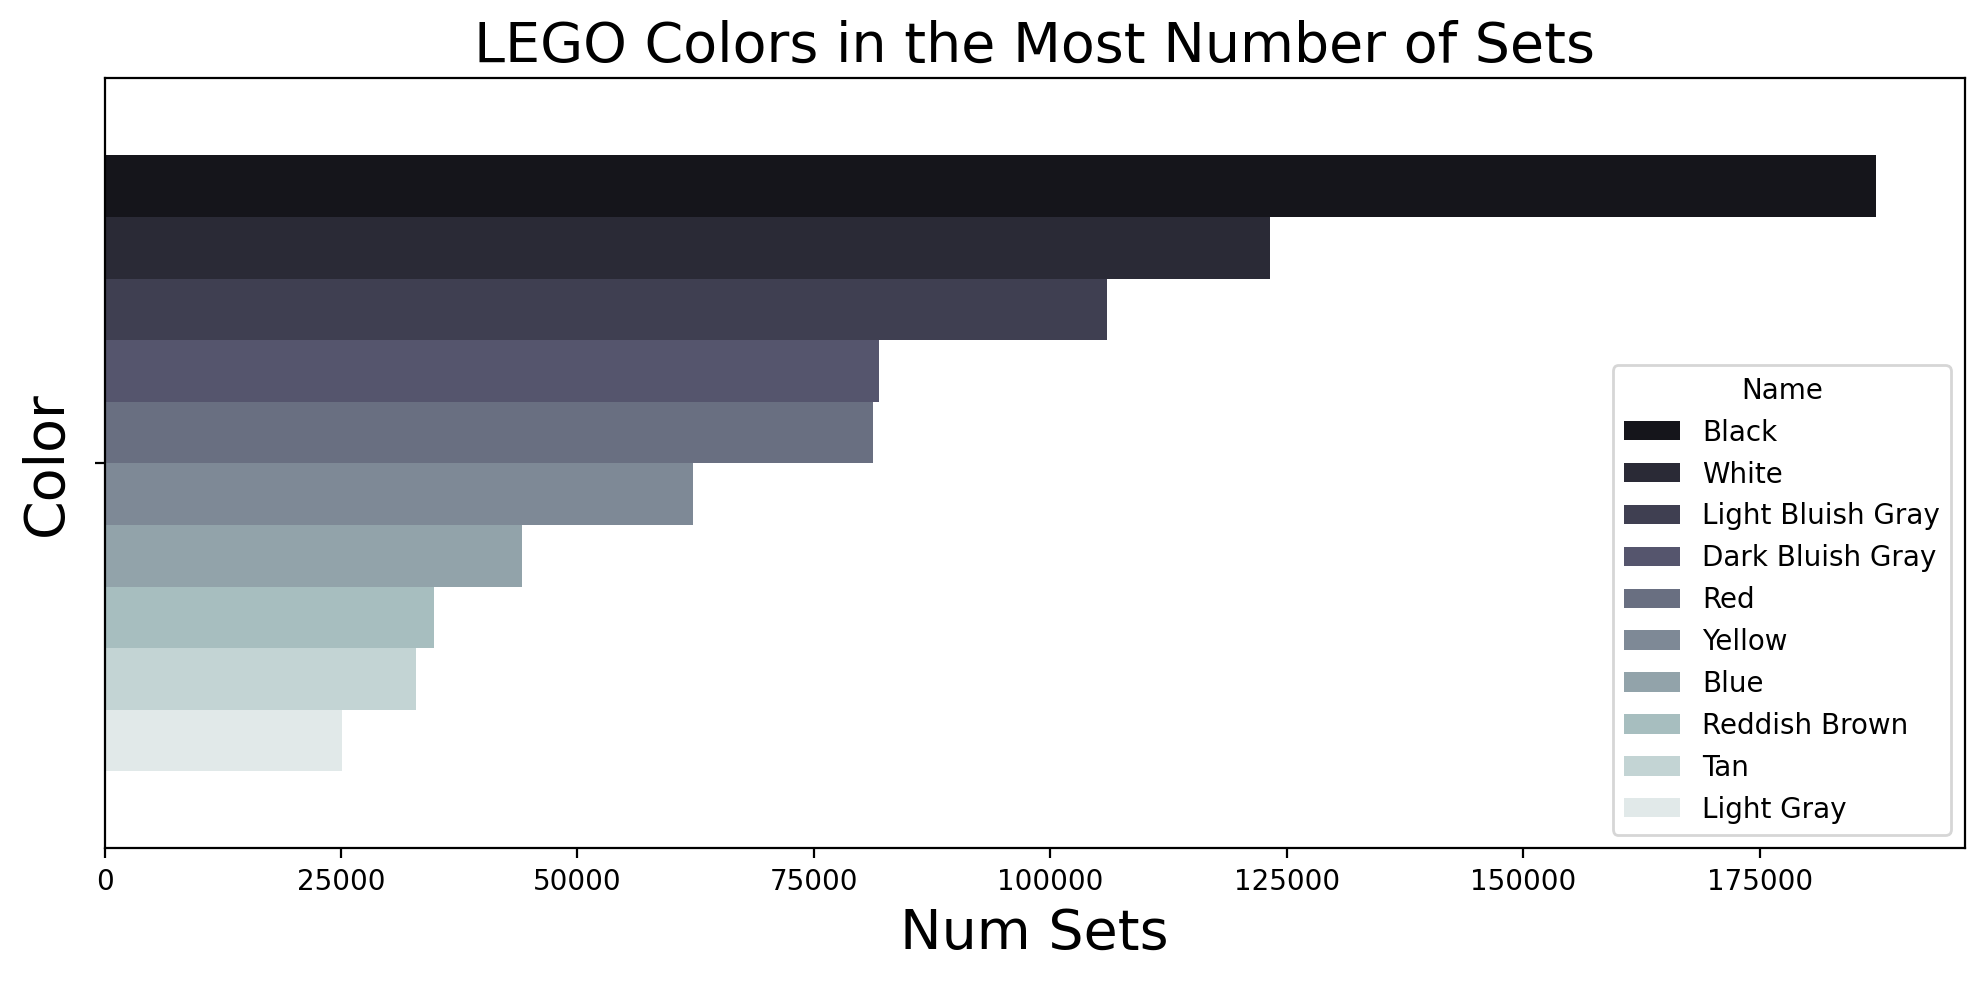

In [ ]:
# Taking a look at the Top 10 LEGO Colors by the Number of Sets
top10_colors = colors_df.sort_values(by='Num Sets', ascending=False).head(10)
sns.barplot(x='Num Sets', hue='Name', data= top10_colors, palette='bone')
plt.title('LEGO Colors in the Most Number of Sets', fontsize = 20)
plt.xlabel('Num Sets', fontsize = 20)
plt.ylabel('Color', fontsize = 20);

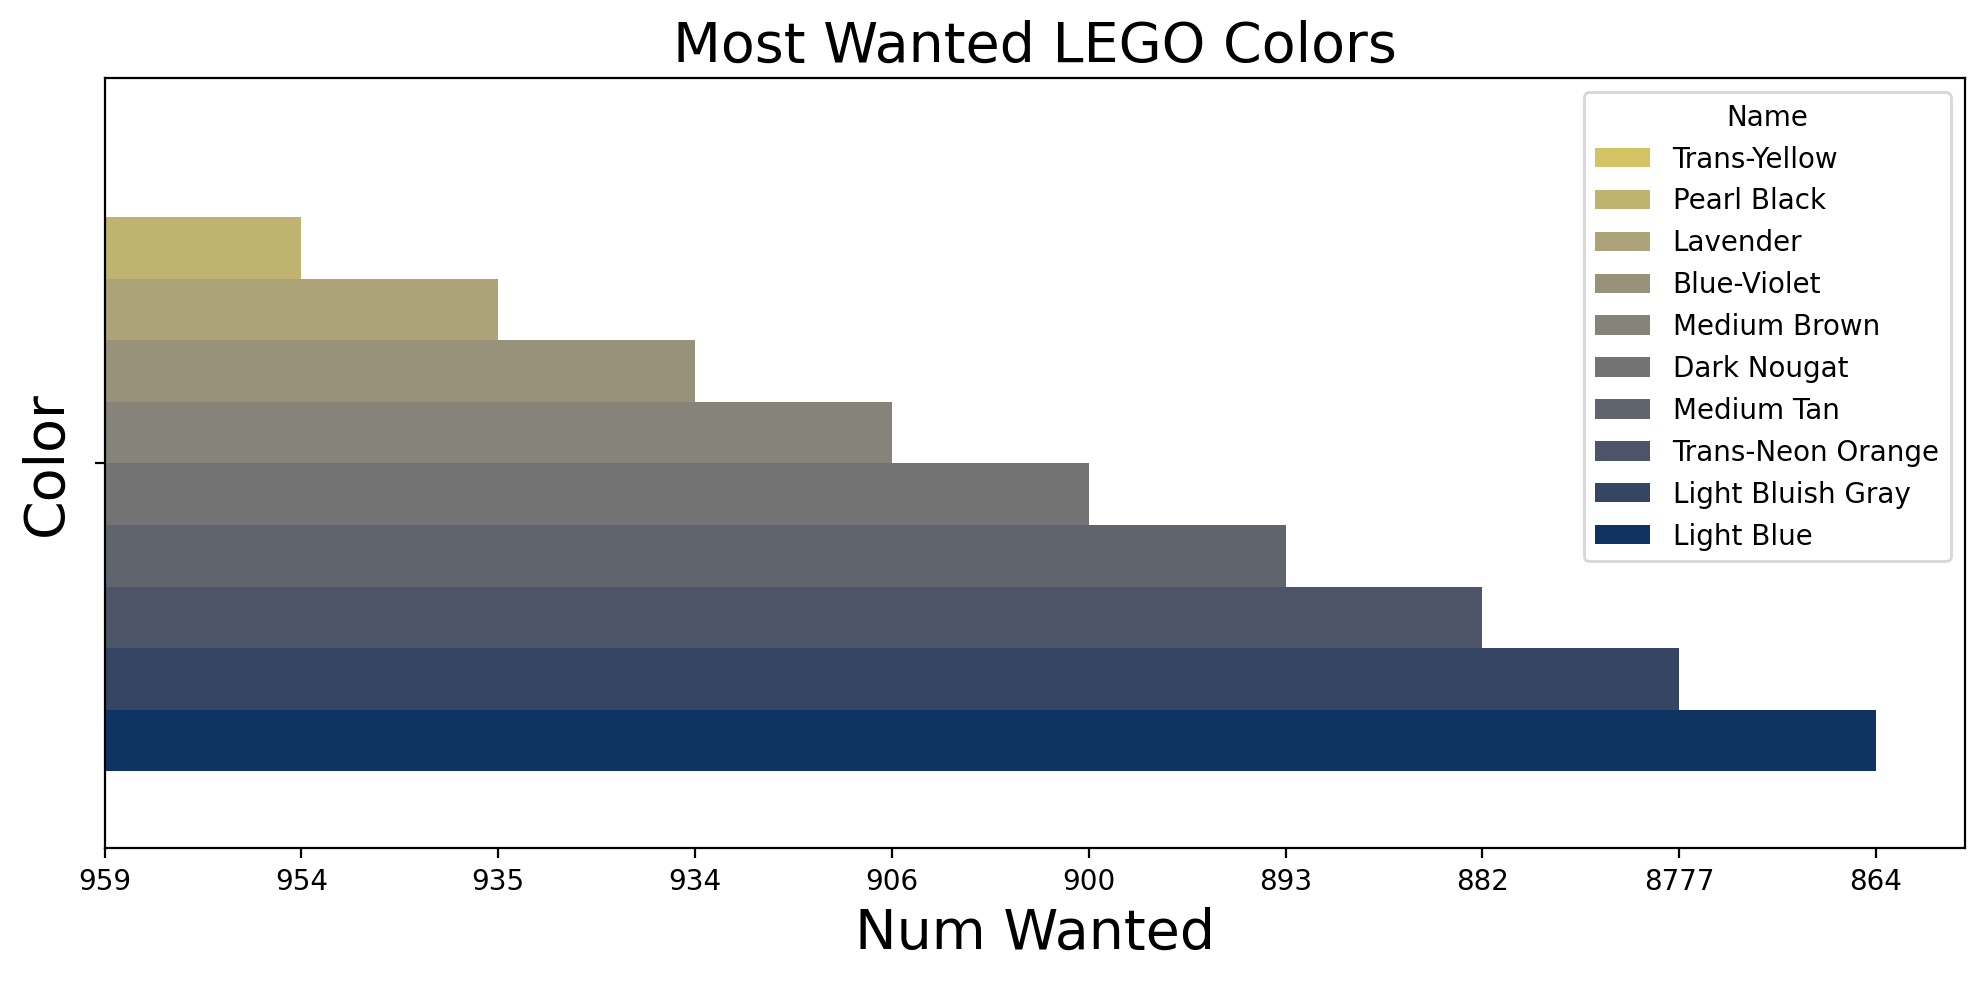

In [ ]:
# Taking a look at the Top 10 Most Wanted Colors
most_wanted_colors = colors_df.sort_values(by='Wanted', ascending=False).head(10)
sns.barplot(x='Wanted', hue='Name', data= most_wanted_colors, palette='cividis_r')
plt.title('Most Wanted LEGO Colors', fontsize = 20)
plt.xlabel('Num Wanted', fontsize = 20)
plt.ylabel('Color', fontsize = 20);

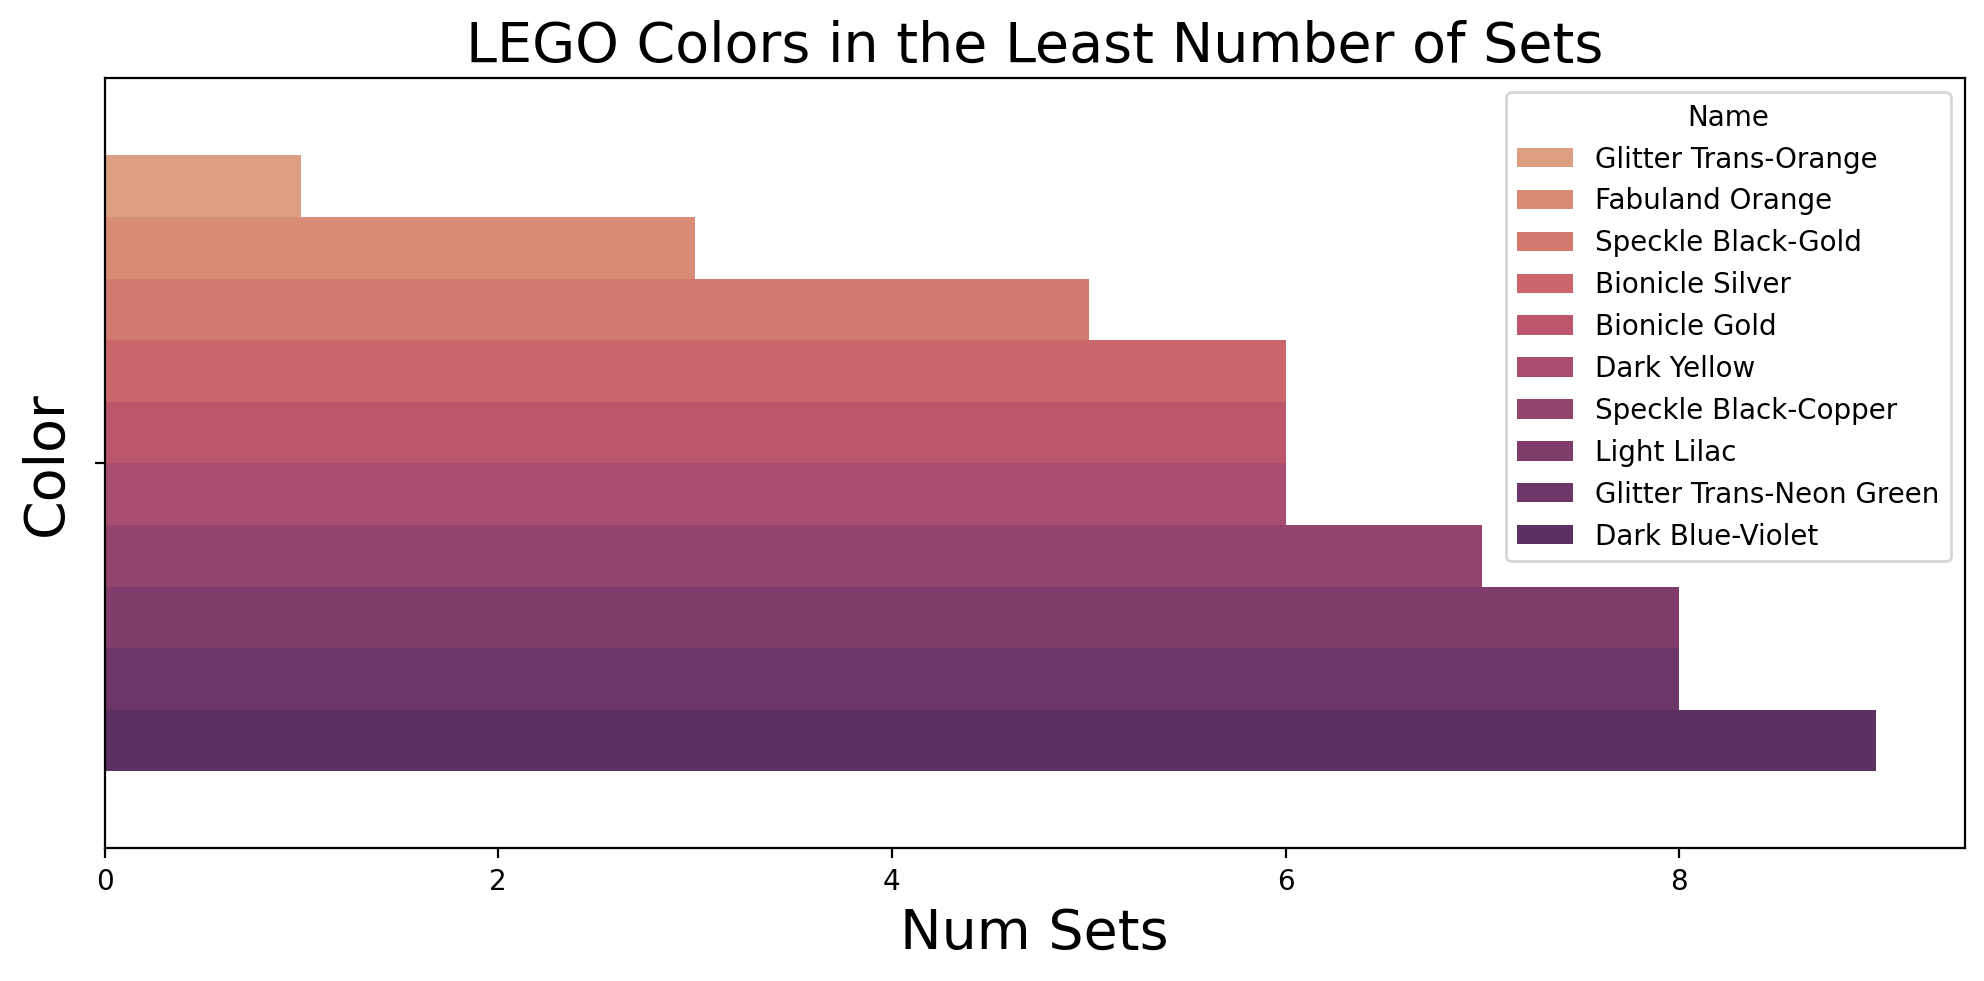

In [ ]:
# Taking a look at the Bottom 10 Colors by the Number of Sets
bot10_colors = colors_df.sort_values(by='Num Sets', ascending=True).head(10)
sns.barplot(x='Num Sets', hue='Name', data= bot10_colors, palette='flare')
plt.title('LEGO Colors in the Least Number of Sets', fontsize = 20)
plt.xlabel('Num Sets', fontsize = 20)
plt.ylabel('Color', fontsize = 20);

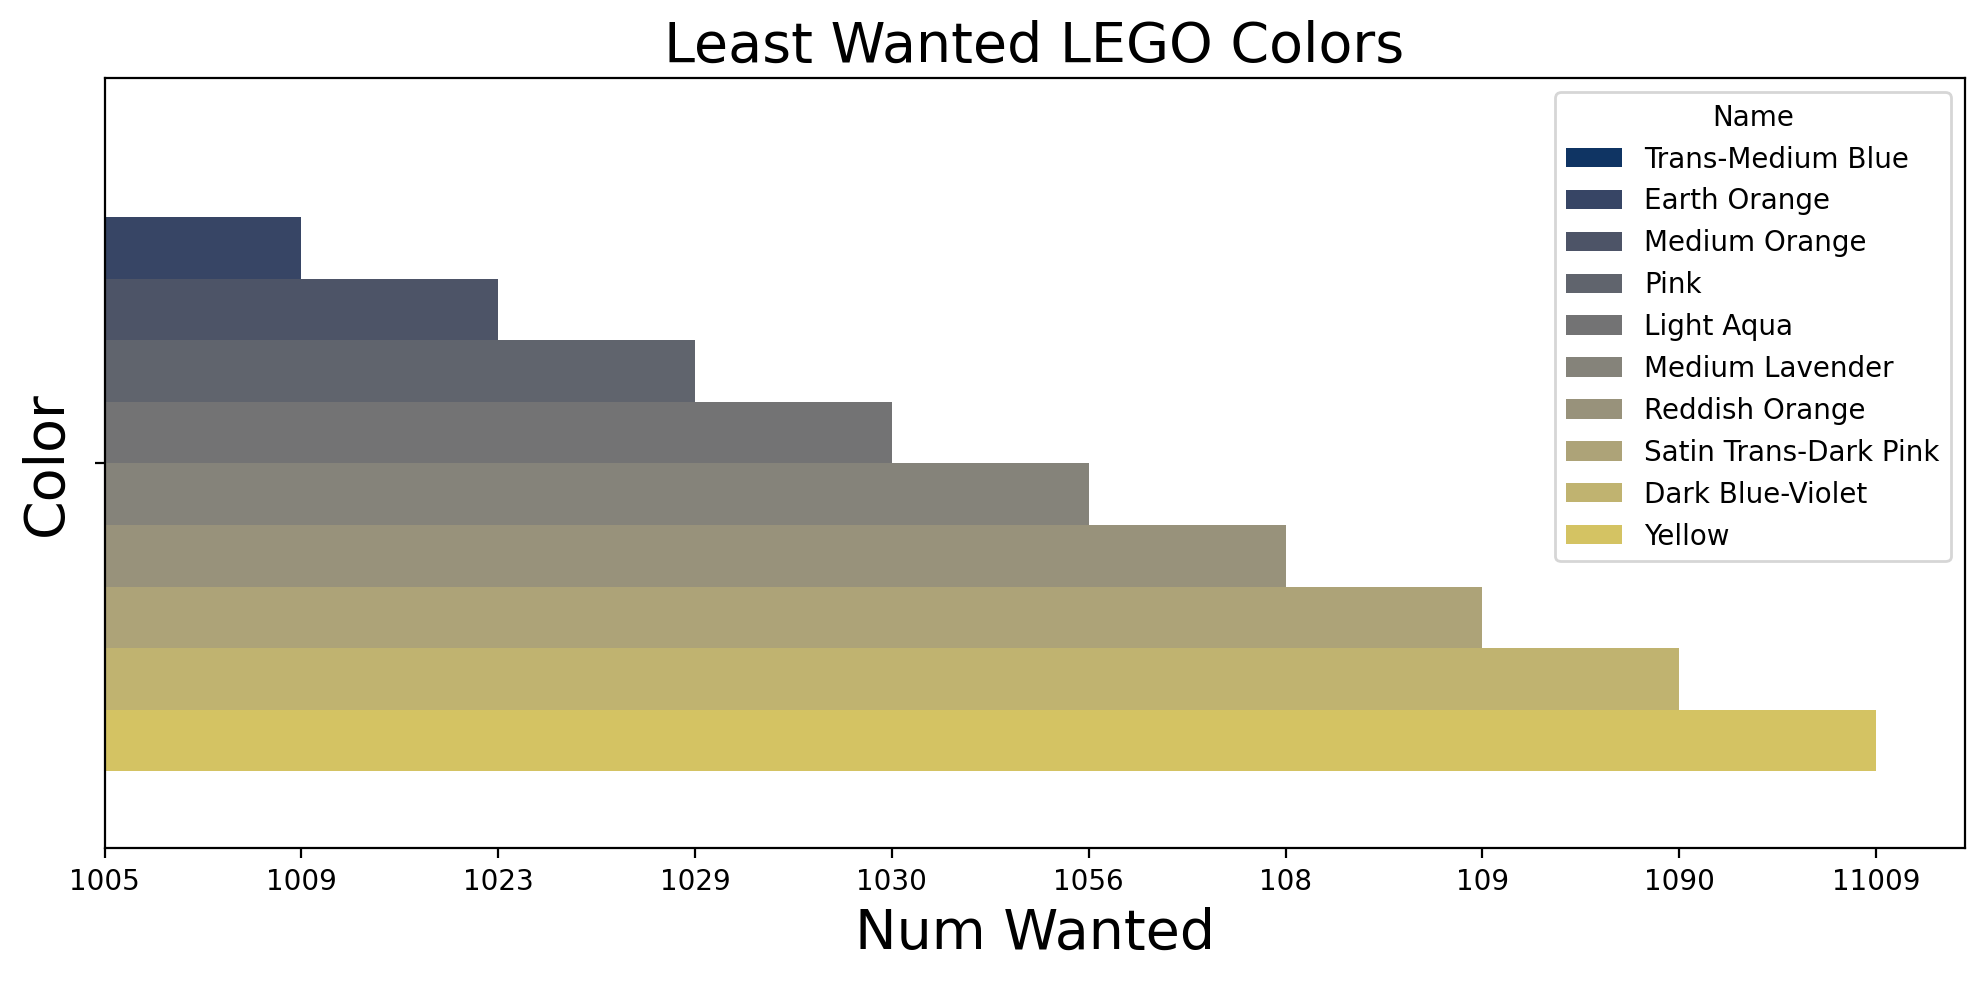

In [ ]:
# Taking a look at the Least Wanted 10 Colors by the Number of Sets
least_wanted_colors = colors_df.sort_values(by='Wanted', ascending=True).head(10)
sns.barplot(x='Wanted', hue='Name', data= least_wanted_colors, palette='cividis')
plt.title('Least Wanted LEGO Colors', fontsize = 20)
plt.xlabel('Num Wanted', fontsize = 20)
plt.ylabel('Color', fontsize = 20);

# SQ3 Analysis
- Most wanted LEGO colors does not always match most common in LEGO sets.

# SQ4: Does price variability have a significant impact on set popularity?

# SQ4 Analysis


# SQ5: What impact do consumer ratings and reviews have on set popularity?

# SQ5 Analysis

# SQ6: How does the presence of LEGO Minifigures affect the set popularity?

# SQ6 Analysis

# SQ7: Does the designer of the LEGO set have any influence on its popularity?

# SQ7 Analysis